In [2]:
pip install bing_image_downloader

Note: you may need to restart the kernel to use updated packages.


In [3]:
from bing_image_downloader import downloader
import os
import warnings
warnings.filterwarnings("ignore")
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
query = "horse"
output_dir = "images"
limit = 100 

downloader.download(
    query,
    limit=limit,
    output_dir=output_dir,
    adult_filter_off=True,
    force_replace=False,
    verbose=False,
)

[%] Downloading Images to /kaggle/working/images/horse
[!] Issue getting: https://i1.wp.com/exploring-usa.com/wp-content/uploads/2021/03/8.-Thoroughbred.jpg?resize=1536%2C1344&amp;ssl=1
[!] Error:: HTTP Error 404: Not Found
[Error]Invalid image, not saving https://www.publicdomainpictures.net/pictures/40000/velka/horse-portriat.jpg

[!] Issue getting: https://www.publicdomainpictures.net/pictures/40000/velka/horse-portriat.jpg
[!] Error:: Invalid image, not saving https://www.publicdomainpictures.net/pictures/40000/velka/horse-portriat.jpg

[!] Issue getting: https://mattwyles.files.wordpress.com/2014/10/spectacular-horses-horses-19665127-1146-1148.jpg
[!] Error:: HTTP Error 410: Gone
[!] Issue getting: http://www.apaintedpet.com/images/chestnut-horse-portrait.jpg
[!] Error:: HTTP Error 404: Not Found
[Error]Invalid image, not saving http://allart.biz/up/photos/album/collection/lng/georgestubbs-whistlejacket.jpg

[!] Issue getting: http://allart.biz/up/photos/album/collection/lng/georg

In [4]:
query = "goat"
output_dir = "images"
limit = 100 

downloader.download(
    query,
    limit=limit,
    output_dir=output_dir,
    adult_filter_off=True,
    force_replace=False,
    verbose=False,
)

[%] Downloading Images to /kaggle/working/images/goat
[!] Issue getting: https://static.vecteezy.com/system/resources/previews/024/404/781/large_2x/goat-isolated-on-white-background-generate-ai-free-photo.jpg
[!] Error:: HTTP Error 403: Forbidden
[Error]Invalid image, not saving https://wallpapers.com/images/hd/beautiful-white-baby-goat-with-tiny-horns-u6elnhjqsfgo5oe2.jpg

[!] Issue getting: https://wallpapers.com/images/hd/beautiful-white-baby-goat-with-tiny-horns-u6elnhjqsfgo5oe2.jpg
[!] Error:: Invalid image, not saving https://wallpapers.com/images/hd/beautiful-white-baby-goat-with-tiny-horns-u6elnhjqsfgo5oe2.jpg

[!] Issue getting: https://wallpapercrafter.com/desktop6/1507481-billy-goat-livestock-goatee-nature-horns-domestic.jpg
[!] Error:: HTTP Error 403: Forbidden
[!] Issue getting: https://www.icr.org/i/Main Stage - 1400x1050/Mountain_Goats_1400x1050.jpg
[!] Error:: URL can't contain control characters. '/i/Main Stage - 1400x1050/Mountain_Goats_1400x1050.jpg' (found at least 

In [5]:
import os

def rename_files(folder_path, new_name_base):
    # Get list of files in the directory
    files = os.listdir(folder_path)

    # Iterate through each file and rename it
    for i, filename in enumerate(files, start=1):
        # Construct the new file name with the base name and file index
        file_extension = os.path.splitext(filename)[1]  # Keep the original file extension
        new_name = f"{new_name_base}_{i}{file_extension}"
        # Form full old and new file paths
        old_path = os.path.join(folder_path, filename)
        new_path = os.path.join(folder_path, new_name)
        
        # Rename the file
        os.rename(old_path, new_path)


In [6]:
rename_files("/kaggle/working/images/goat", "goat")
rename_files("/kaggle/working/images/horse", "horse")

In [7]:
from PIL import Image
import os

# List of directories to convert files
folders = ["/kaggle/working/images/horse", "/kaggle/working/images/goat"]

# Supported formats (add others if needed)
supported_formats = (".png", ".bmp", ".tiff", ".jpeg", ".webp", ".gif")

for folder_path in folders:
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(supported_formats):
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path).convert("RGB")
            # Create a new filename with .jpg extension
            new_filename = os.path.splitext(filename)[0] + ".jpg"
            img.save(os.path.join(folder_path, new_filename), "JPEG")
            os.remove(img_path)  # Optional: Remove the original file


In [8]:
from os import makedirs
from os import listdir
import shutil
import random
def create_train_test_split(horse_dir, goat_dir, output_dir, train_ratio=0.8):
    # Ensure the directory structure exists
    os.makedirs(os.path.join(output_dir, 'train', 'horses'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'train', 'goats'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test', 'horses'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test', 'goats'), exist_ok=True)
    
    # List all files in the horse and goat directories
    horse_images = os.listdir(horse_dir)
    goat_images = os.listdir(goat_dir)

    # Shuffle the lists for randomness
    random.shuffle(horse_images)
    random.shuffle(goat_images)

    # Split the data into training and testing sets
    num_train_horse = int(len(horse_images) * train_ratio)
    num_train_goat = int(len(goat_images) * train_ratio)

    train_horse = horse_images[:num_train_horse]
    test_horse = horse_images[num_train_horse:]

    train_goat = goat_images[:num_train_goat]
    test_goat = goat_images[num_train_goat:]

    # Move the files to the respective directories
    for img in train_horse:
        shutil.copy(os.path.join(horse_dir, img), os.path.join(output_dir, 'train', 'horses', img))
    for img in test_horse:
        shutil.copy(os.path.join(horse_dir, img), os.path.join(output_dir, 'test', 'horses', img))

    for img in train_goat:
        shutil.copy(os.path.join(goat_dir, img), os.path.join(output_dir, 'train', 'goats', img))
    for img in test_goat:
        shutil.copy(os.path.join(goat_dir, img), os.path.join(output_dir, 'test', 'goats', img))

    print("Dataset split completed.")


In [9]:
horse_dir = "/kaggle/working/images/horse"
goat_dir = "/kaggle/working/images/goat"
output_dir = '/kaggle/working/dataset_horses_vs_goats'

create_train_test_split(horse_dir, goat_dir, output_dir)

Dataset split completed.


In [10]:
from matplotlib import pyplot
from matplotlib.image import imread


def plot_images(folder, animal_name):
    """
    Plots the first few images from a given folder and titles them with the animal name.
    
    Parameters:
    folder (str): Path to the folder containing the images.
    animal_name (str): The name of the animal to display as the title of the images.
    """

    files = os.listdir(folder)  # List all files in the folder
    i = 0
    for file_name in files[:9]:  # Limiting to the first 9 images
        # Set the main title for all images
        pyplot.suptitle(animal_name)
        # Define subplot
        pyplot.subplot(330 + 1 + i)
        # Read and plot the image
        image = imread(os.path.join(folder, file_name))
        pyplot.imshow(image)
        i += 1  # Increment index for next subplot
    # Display the images
    pyplot.subplots_adjust(wspace=0.4, hspace=0.4)
    
    pyplot.show()

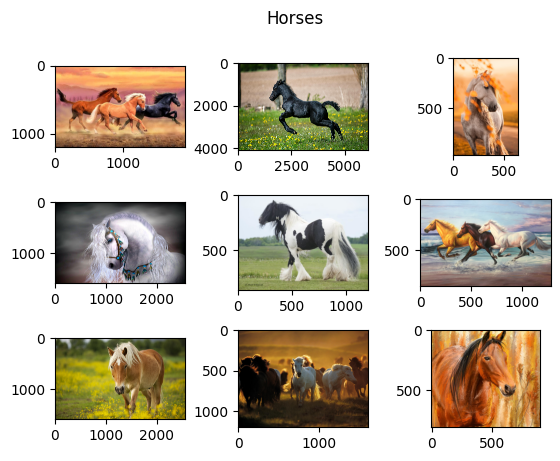

In [11]:
plot_images("/kaggle/working/dataset_horses_vs_goats/train/horses", "Horses")

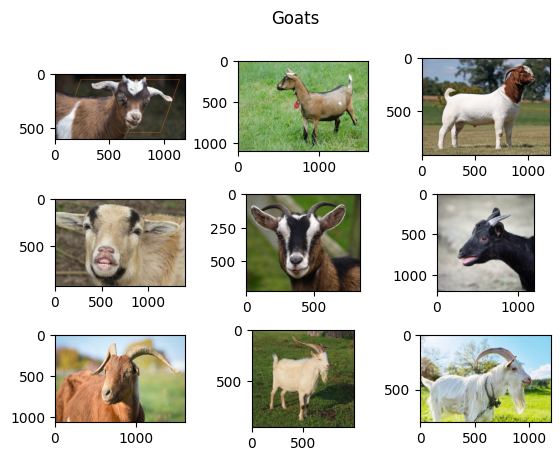

In [12]:
plot_images("/kaggle/working/dataset_horses_vs_goats/train/goats", "Goats")

In [5]:
import tensorflow as tf   # noqa: E402

if tf.test.gpu_device_name():
    print("GPU is available")
else:
    print("GPU is not available. Switching to CPU.")

GPU is not available. Switching to CPU.


In [14]:
import sys
import tensorflow as tf
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
from tensorflow.keras.backend import clear_session
from tqdm.keras import TqdmCallback
from time import time
import shutil
import numpy as np
import pandas as pd
import os




class BatchLoggingCallback(tf.keras.callbacks.Callback):
    def __init__(self, log_dir):
        super(BatchLoggingCallback, self).__init__()
        self.writer = tf.summary.create_file_writer(log_dir)

    def on_train_batch_end(self, batch, logs=None):
        with self.writer.as_default():
            tf.summary.scalar('Training loss v/s iterations', logs['loss'], step=self.model.optimizer.iterations)
            tf.summary.scalar('Training accuracy v/s iterations', logs['accuracy'], step=self.model.optimizer.iterations)

    def on_test_batch_end(self, batch, logs=None):
        with self.writer.as_default():
            tf.summary.scalar('Testing accuracy v/s iterations', logs['accuracy'], step=self.model.optimizer.iterations)

    def on_epoch_end(self, epoch, logs=None):
        self.writer.flush()
        


def log_test_images(model, test_it, log_dir):
    test_images, test_labels = next(test_it)
    predictions = model.predict(test_images, verbose=0)  # Ensure verbose=0
    predictions = (predictions > 0.5).astype(int)

    with tf.summary.create_file_writer(log_dir).as_default():
        for i in range(len(test_images)):
            image = test_images[i]
            prediction = predictions[i][0]
            label = test_labels[i]
            tf.summary.image(
                f'Test Image {i} - Pred: {"Horse" if prediction == 1 else "Goat"}, Actual: {"Horse" if label == 1 else "Goat"}',
                np.expand_dims(image, 0),
                step=i,
                description=f'Pred: {"Horse" if prediction == 1 else "Goat"}, Actual: {"Horse" if label == 1 else "Goat"}'
            )
    del test_images, test_labels, predictions

            
            
            
# Function to plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    pyplot.legend(loc='upper right')  # add legend for loss

    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    pyplot.legend(loc='upper left')  # add legend for accuracy

    # Adjust layout and show the plot
    pyplot.tight_layout()
    pyplot.show()
    
    
                

def run_test_harness(define_model):
    clear_session()  # Free resources from previous runs

    start_time = time()
    model = define_model()

    log_dir = './logs/' + model.name
    if os.path.exists(log_dir):
        shutil.rmtree(log_dir)
    os.makedirs(log_dir, exist_ok=True)

    tensorboard_callback = TensorBoard(log_dir=log_dir)
    batch_logging_callback = BatchLoggingCallback(log_dir=log_dir)

    datagen = ImageDataGenerator(rescale=1.0 / 255.0)
    train_it = datagen.flow_from_directory(
        '/kaggle/working/dataset_horses_vs_goats/train/',
        class_mode='binary',
        batch_size=64,
        target_size=(200, 200)
    )
    test_it = datagen.flow_from_directory(
        '/kaggle/working/dataset_horses_vs_goats/test/',
        class_mode='binary',
        batch_size=64,
        target_size=(200, 200)
    )

    history = model.fit(
        train_it,
        validation_data=test_it,
        epochs=20,
        verbose=0,
        callbacks=[tensorboard_callback, batch_logging_callback]
    )

    training_time = time() - start_time
    train_loss = history.history["loss"][-1]
    train_acc = history.history["accuracy"][-1]

    log_test_images(model, test_it, log_dir)

    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))

    trainable_params = int(tf.reduce_sum([tf.size(v) for v in model.trainable_variables]).numpy())

    model_results = {
        "Model": model.name,
        "Training Time (s)": training_time,
        "Training Loss": train_loss,
        "Training Accuracy": train_acc,
        "Testing Accuracy": acc,
        "Trainable Parameters": trainable_params,
    }
    # save model
    model.save(f'./models/{model.name}.h5')    
    # Loading from CSV
    model_performance_df = pd.read_csv("model_performance.csv")

    # Create a DataFrame for the new model results
    new_model_results = pd.DataFrame([model_results])

    # Append the new results to the existing DataFrame
    model_performance_df = pd.concat([model_performance_df, new_model_results], ignore_index=True)
    # Saving to CSV
    model_performance_df.to_csv("model_performance.csv", index=False)
    summarize_diagnostics(history)
    del model, train_it, test_it, datagen, tensorboard_callback, batch_logging_callback, history


In [15]:
model_performance_df = pd.DataFrame(
    columns=[
        "Model",
        "Training Time (s)",
        "Training Loss",
        "Training Accuracy",
        "Testing Accuracy",
        "Trainable Parameters",
    ]
)
# Saving to CSV
model_performance_df.to_csv("model_performance.csv", index=False)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
> 62.500


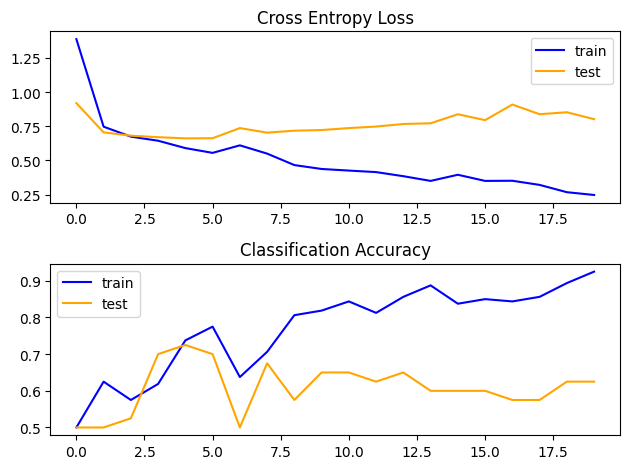

In [16]:
# Define CNN model
def define_model_vgg1():
    model = Sequential(name="VGG1")
    model.add(Input(shape=(200, 200, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Entry point, run the test harness
run_test_harness(define_model_vgg1)


Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
> 65.000


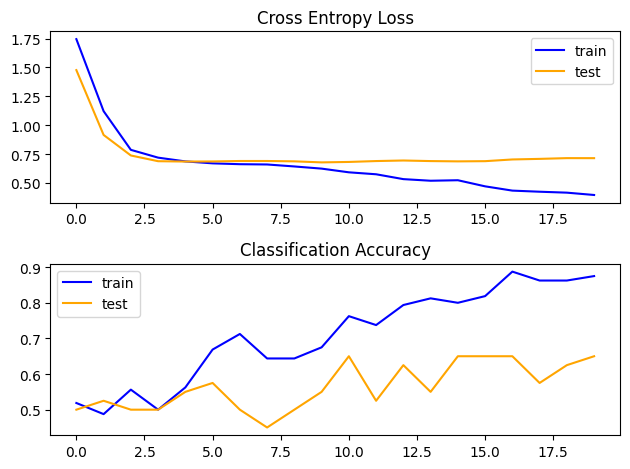

In [17]:
# define cnn model
def define_model_vgg3():
    model = Sequential(name="VGG3")
    model.add(Input(shape=(200, 200, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model
 
# entry point, run the test harness
run_test_harness(define_model_vgg3)


In [18]:
# Run the test harness for evaluating the model
def run_test_harness_augmentation(define_model):
    clear_session()
    start_time = time()
    # Define model
    model = define_model()
    log_dir = './logs/' + 'VGG3_Augmentation'
    tensorboard_callback = TensorBoard(log_dir=log_dir)
    batch_logging_callback = BatchLoggingCallback(log_dir=log_dir)
    # create data generators
    train_datagen = ImageDataGenerator(rescale=1.0/255.0,
        width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = train_datagen.flow_from_directory('/kaggle/working/dataset_horses_vs_goats/train/',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    test_it = test_datagen.flow_from_directory('/kaggle/working/dataset_horses_vs_goats/test/',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    # Fit model with TensorBoard and batch logging callbacks
    history = model.fit(train_it, validation_data=test_it, epochs=20, verbose=0,
                        callbacks=[tensorboard_callback, batch_logging_callback])
    
    # End time for training measurement
    training_time = time() - start_time
    # Get training loss and accuracy from history
    train_loss = history.history["loss"][-1]
    train_acc = history.history["accuracy"][-1]
    
    # Log test images with predictions
    log_test_images(model, test_it, log_dir)
    # Evaluate model
    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    
    # Count the number of trainable parameters in the model
    trainable_params = int(
        tf.reduce_sum([tf.size(v) for v in model.trainable_variables]).numpy()
    )

    model_results = {
        "Model": "VGG3_augmentation",  # Get model name from type
        "Training Time (s)": training_time,
        "Training Loss": train_loss,
        "Training Accuracy": train_acc,
        "Testing Accuracy": acc,
        "Trainable Parameters": trainable_params,
    }
    # save model
    model.save('./models/VGG3_augmentation.h5')    
    # Loading from CSV
    model_performance_df = pd.read_csv("model_performance.csv")

    # Create a DataFrame for the new model results
    new_model_results = pd.DataFrame([model_results])

    # Append the new results to the existing DataFrame
    model_performance_df = pd.concat([model_performance_df, new_model_results], ignore_index=True)
    # Saving to CSV
    model_performance_df.to_csv("model_performance.csv", index=False)
    summarize_diagnostics(history)
    del model, train_it, test_it, train_datagen, test_datagen, tensorboard_callback, batch_logging_callback, history


Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
> 70.000


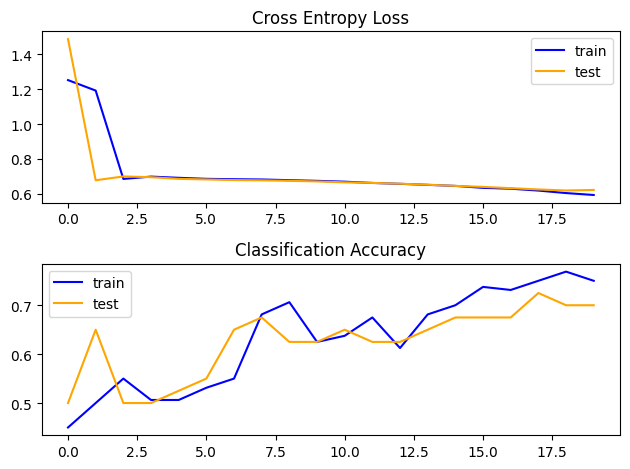

In [19]:
run_test_harness_augmentation(define_model_vgg3)

In [20]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model


# define cnn model
def define_model_vgg16_all():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = True
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

In [21]:
# Run the test harness for evaluating the model
def run_test_harness_vgg16_all_layers(define_model):
	clear_session()
	start_time = time()
	# Define model
	model = define_model()
	log_dir = './logs/' + "VGG16_all_layers"
	tensorboard_callback = TensorBoard(log_dir=log_dir)
	batch_logging_callback = BatchLoggingCallback(log_dir=log_dir)
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]    
	# Prepare iterators
	train_it = datagen.flow_from_directory('/kaggle/working/dataset_horses_vs_goats/train/',
											class_mode='binary', batch_size=64, target_size=(224, 224))
	test_it = datagen.flow_from_directory('/kaggle/working/dataset_horses_vs_goats/test/',
											class_mode='binary', batch_size=64, target_size=(224, 224))
	# Fit model with TensorBoard and batch logging callbacks
	history = model.fit(train_it, validation_data=test_it, epochs=20, verbose=0,
						callbacks=[tensorboard_callback, batch_logging_callback])

	# End time for training measurement
	training_time = time() - start_time
	# Get training loss and accuracy from history
	train_loss = history.history["loss"][-1]
	train_acc = history.history["accuracy"][-1]

	# Log test images with predictions
	log_test_images(model, test_it, log_dir)
	# Evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))

	# Count the number of trainable parameters in the model
	trainable_params = int(
		tf.reduce_sum([tf.size(v) for v in model.trainable_variables]).numpy()
	)

	model_results = {
		"Model": "VGG16_all_layers",  # Get model name from type
		"Training Time (s)": training_time,
		"Training Loss": train_loss,
		"Training Accuracy": train_acc,
		"Testing Accuracy": acc,
		"Trainable Parameters": trainable_params,
	}
	model.save('./models/VGG16_all_layers.h5') 
	# Loading from CSV
	model_performance_df = pd.read_csv("model_performance.csv")

	# Create a DataFrame for the new model results
	new_model_results = pd.DataFrame([model_results])

	# Append the new results to the existing DataFrame
	model_performance_df = pd.concat([model_performance_df, new_model_results], ignore_index=True)
	# Saving to CSV
	model_performance_df.to_csv("model_performance.csv", index=False)
	summarize_diagnostics(history)
	del model,train_it, test_it, datagen, tensorboard_callback, batch_logging_callback, history


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
> 50.000


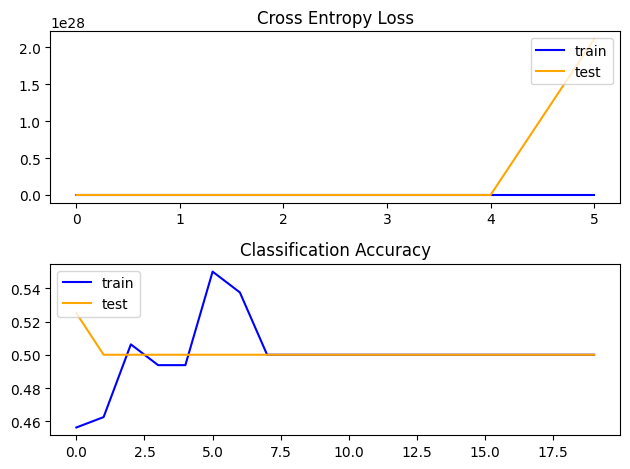

In [22]:
run_test_harness_vgg16_all_layers(define_model_vgg16_all) 

In [23]:
# Run the test harness for evaluating the model
def run_test_harness_vgg16_MLP_layers(define_model):
	clear_session()
	start_time = time()
	# Define model
	model = define_model()
	log_dir = './logs/' + "VGG16_MLP_layers"
	tensorboard_callback = TensorBoard(log_dir=log_dir)
	batch_logging_callback = BatchLoggingCallback(log_dir=log_dir)
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]    
	# Prepare iterators
	train_it = datagen.flow_from_directory('/kaggle/working/dataset_horses_vs_goats/train/',
											class_mode='binary', batch_size=64, target_size=(224, 224))
	test_it = datagen.flow_from_directory('/kaggle/working/dataset_horses_vs_goats/test/',
											class_mode='binary', batch_size=64, target_size=(224, 224))
	# Fit model with TensorBoard and batch logging callbacks
	history = model.fit(train_it, validation_data=test_it, epochs=20, verbose=0,
						callbacks=[tensorboard_callback, batch_logging_callback])

	# End time for training measurement
	training_time = time() - start_time
	# Get training loss and accuracy from history
	train_loss = history.history["loss"][-1]
	train_acc = history.history["accuracy"][-1]

	# Log test images with predictions
	log_test_images(model, test_it, log_dir)
	# Evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))

	# Count the number of trainable parameters in the model
	trainable_params = int(
		tf.reduce_sum([tf.size(v) for v in model.trainable_variables]).numpy()
	)

	model_results = {
		"Model": "VGG16_MLP_layers",  # Get model name from type
		"Training Time (s)": training_time,
		"Training Loss": train_loss,
		"Training Accuracy": train_acc,
		"Testing Accuracy": acc,
		"Trainable Parameters": trainable_params,
	}
 
	model.save('./models/VGG16_MLP_layers.h5') 
	# Loading from CSV
	model_performance_df = pd.read_csv("model_performance.csv")

	# Create a DataFrame for the new model results
	new_model_results = pd.DataFrame([model_results])

	# Append the new results to the existing DataFrame
	model_performance_df = pd.concat([model_performance_df, new_model_results], ignore_index=True)
	# Saving to CSV
	model_performance_df.to_csv("model_performance.csv", index=False)
	summarize_diagnostics(history)
	del model, train_it, test_it, datagen, tensorboard_callback, batch_logging_callback, history


In [24]:
# define cnn model
def define_model_vgg16_MLP():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model


Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
> 97.500


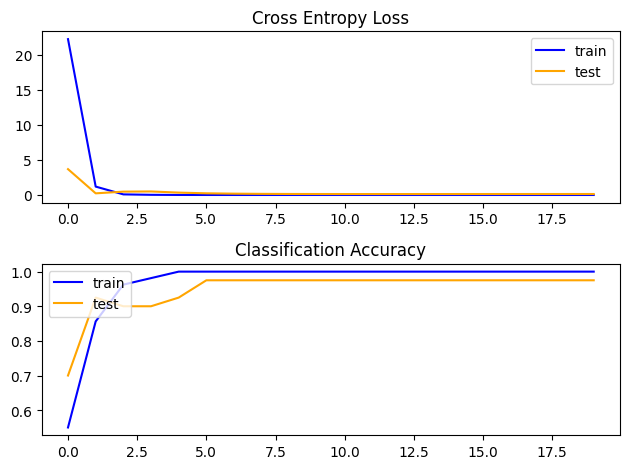

In [25]:
run_test_harness_vgg16_MLP_layers(define_model_vgg16_MLP)


## Are the results as expected? Why or why not?
- The results show varying levels of training and testing accuracy across different models and configurations. 
- Overall, the performance seems to align with expectations to some extent. Models with more trainable parameters and deeper architectures tend to have higher training accuracy, but this doesn't always translate to better testing accuracy. 
- For example, VGG16_MLP_layer has perfect training accuracy but slightly lower testing accuracy compared to VGG16_all_layer, indicating potential overfitting.

## Does data augmentation help? Why or why not?
- In this case, data augmentation (VGG_3blocks_data_aug) did not significantly improve testing accuracy compared to the model without data augmentation (VGG_3block).
- Data augmentation helps in improving model generalization by artificially increasing the diversity of the training dataset, which can prevent overfitting. However, its effectiveness depends on the dataset and the augmentation techniques used. In some cases, data augmentation may not lead to significant improvements if the original dataset is already diverse enough or if the augmentation techniques are not appropriate for the task.

## Does it matter how many epochs you fine-tune the model? Why or why not?
- The number of epochs for fine-tuning can impact the model's performance.
- Training for too few epochs may result in underfitting, where the model fails to capture the underlying patterns in the data.
- On the other hand, training for too many epochs may lead to overfitting, where the model learns noise in the training data and fails to generalize well to unseen data.
- It's essential to find a balance by monitoring the training and validation performance and using techniques like early stopping to prevent overfitting.

## Are there any particular images that the model is confused about? Why or why not?
- Confusion can arise when images from different classes share similar features or when there are ambiguous images that even humans might struggle to classify correctly.
- Techniques like visualizing misclassified images or analyzing confusion matrices can help identify patterns of confusion and potentially improve the model's performance by addressing these specific cases.


In [26]:
def MLP():
    model = Sequential(name="MLP")
    model.add(Flatten(input_shape=(200, 200, 3)))  # Input shape similar to VGG16
    model.add(Dense(4096, activation='relu'))      # Layer 1
    model.add(Dense(4096, activation='relu'))      # Layer 2
    model.add(Dense(4096, activation='relu'))      # Layer 3
    model.add(Dense(1, activation='sigmoid'))      # Output layer for binary classification
    
    # Compile model with SGD optimizer and binary cross-entropy loss
    opt = SGD(learning_rate=0.001, momentum=0.5)   # Similar to VGG16 optimizer setup
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

model = MLP()
model.summary()

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 120000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4096)           │   491,524,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 525,090,817 (1.96 GB)

 Trainable params: 525,090,817 (1.96 GB)

 Non-trainable params: 0 (0.00 B)

In [27]:
def run_test_harness(define_model):
    clear_session()  # Free resources from previous runs

    start_time = time()
    model = define_model()

    log_dir = './logs/' + model.name
    if os.path.exists(log_dir):
        shutil.rmtree(log_dir)
    os.makedirs(log_dir, exist_ok=True)

    tensorboard_callback = TensorBoard(log_dir=log_dir)
    batch_logging_callback = BatchLoggingCallback(log_dir=log_dir)

    datagen = ImageDataGenerator(rescale=1.0 / 255.0)
    train_it = datagen.flow_from_directory(
        '/kaggle/working/dataset_horses_vs_goats/train/',
        class_mode='binary',
        batch_size=64,
        target_size=(200, 200)
    )
    test_it = datagen.flow_from_directory(
        '/kaggle/working/dataset_horses_vs_goats/test/',
        class_mode='binary',
        batch_size=64,
        target_size=(200, 200)
    )

    history = model.fit(
        train_it,
        validation_data=test_it,
        epochs=20,
        verbose=0,
        callbacks=[tensorboard_callback, batch_logging_callback]
    )

    training_time = time() - start_time
    train_loss = history.history["loss"][-1]
    train_acc = history.history["accuracy"][-1]

    log_test_images(model, test_it, log_dir)

    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))

    trainable_params = int(tf.reduce_sum([tf.size(v) for v in model.trainable_variables]).numpy())

    model_results = {
        "Model": model.name,
        "Training Time (s)": training_time,
        "Training Loss": train_loss,
        "Training Accuracy": train_acc,
        "Testing Accuracy": acc,
        "Trainable Parameters": trainable_params,
    }
    # save model
    model.save(f'./models/{model.name}.h5')    
    # Loading from CSV
    model_performance_df = pd.read_csv("model_performance.csv")

    # Create a DataFrame for the new model results
    new_model_results = pd.DataFrame([model_results])

    # Append the new results to the existing DataFrame
    model_performance_df = pd.concat([model_performance_df, new_model_results], ignore_index=True)
    # Saving to CSV
    model_performance_df.to_csv("model_performance.csv", index=False)
    summarize_diagnostics(history)
    del model, train_it, test_it, datagen, tensorboard_callback, batch_logging_callback, history

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
> 62.500


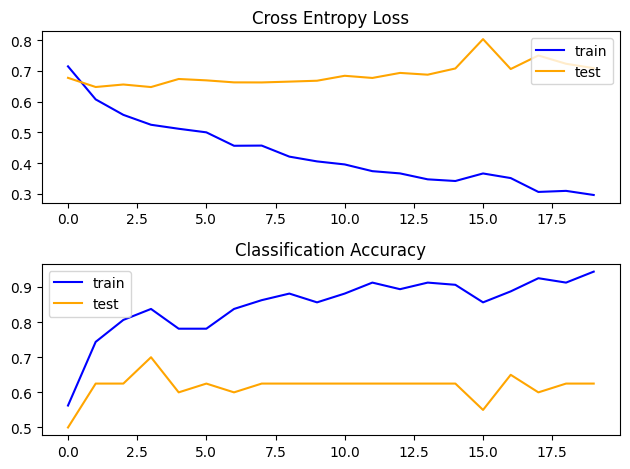

In [28]:
run_test_harness(MLP)

In [6]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model


# load and prepare the image
def load_image(filename, size):
    # load the image
    img = load_img(filename, target_size=(size, size))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, size, size, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example(saved_model, filename, size):
    # load the image
    img = load_image(filename, size)
    # load model
    model = load_model(saved_model)
    # predict the class
    result = model.predict(img)
    # Convert prediction to class label
    if result[0] > 0.5:
        print("Horse")  # Predicted as horse (class 1)
    else:
        print("Goat")  # Predicted as goat (class 0)

In [9]:

run_example('/kaggle/input/temperory/VGG1.h5', '/kaggle/input/temperory/ClassA_easy.jpg', 200)
run_example('/kaggle/input/temperory/VGG1.h5', '/kaggle/input/temperory/ClassA_hard.jpg', 200)
run_example('/kaggle/input/temperory/VGG1.h5', '/kaggle/input/temperory/ClassB_easy.jpg', 200)
run_example('/kaggle/input/temperory/VGG1.h5', '/kaggle/input/temperory/ClassB_hard.jpg', 200)
run_example('/kaggle/input/temperory/VGG1.h5', '/kaggle/input/temperory/ClassA_ClassB.jpg', 200)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Goat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Horse


In [13]:

run_example('/kaggle/input/temperory/VGG3.h5', '/kaggle/input/temperory/ClassA_easy.jpg', 200)
run_example('/kaggle/input/temperory/VGG3.h5', '/kaggle/input/temperory/ClassA_hard.jpg', 200)
run_example('/kaggle/input/temperory/VGG3.h5', '/kaggle/input/temperory/ClassB_easy.jpg', 200)
run_example('/kaggle/input/temperory/VGG3.h5', '/kaggle/input/temperory/ClassB_hard.jpg', 200)
run_example('/kaggle/input/temperory/VGG3.h5', '/kaggle/input/temperory/ClassA_ClassB.jpg', 200)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Goat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Horse


In [10]:

run_example('/kaggle/input/temperory/VGG3_augmentation.h5', '/kaggle/input/temperory/ClassA_easy.jpg', 200)
run_example('/kaggle/input/temperory/VGG3_augmentation.h5', '/kaggle/input/temperory/ClassA_hard.jpg', 200)
run_example('/kaggle/input/temperory/VGG3_augmentation.h5', '/kaggle/input/temperory/ClassB_easy.jpg', 200)
run_example('/kaggle/input/temperory/VGG3_augmentation.h5', '/kaggle/input/temperory/ClassB_hard.jpg', 200)
run_example('/kaggle/input/temperory/VGG3_augmentation.h5', '/kaggle/input/temperory/ClassA_ClassB.jpg', 200)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
Horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Goat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Horse


In [11]:

run_example('/kaggle/input/temperory/VGG16_MLP_layers.h5', '/kaggle/input/temperory/ClassA_easy.jpg', 224)
run_example('/kaggle/input/temperory/VGG16_MLP_layers.h5', '/kaggle/input/temperory/ClassA_hard.jpg', 224)
run_example('/kaggle/input/temperory/VGG16_MLP_layers.h5', '/kaggle/input/temperory/ClassB_easy.jpg', 224)
run_example('/kaggle/input/temperory/VGG16_MLP_layers.h5', '/kaggle/input/temperory/ClassB_hard.jpg', 224)
run_example('/kaggle/input/temperory/VGG16_MLP_layers.h5', '/kaggle/input/temperory/ClassA_ClassB.jpg', 224)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
Horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
Horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
Goat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
Horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
Horse


In [12]:
run_example('/kaggle/input/temperory/MLP.h5', '/kaggle/input/temperory/ClassA_easy.jpg', 200)
run_example('/kaggle/input/temperory/MLP.h5', '/kaggle/input/temperory/ClassA_hard.jpg', 200)
run_example('/kaggle/input/temperory/MLP.h5', '/kaggle/input/temperory/ClassB_easy.jpg', 200)
run_example('/kaggle/input/temperory/MLP.h5', '/kaggle/input/temperory/ClassB_hard.jpg', 200)
run_example('/kaggle/input/temperory/MLP.h5', '/kaggle/input/temperory/ClassA_ClassB.jpg', 200)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Goat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
Horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Horse
